In [125]:
import cv2
import numpy as np

In [126]:
from IPython.display import display, Image

def display_cv_image(image, format='.png'):
    decoded_bytes = cv2.imencode(format, image)[1].tobytes()
    display(Image(data=decoded_bytes))

In [127]:
def fit_size(img, h, w):
    size = img.shape[:2]
    f = min(h / size[0], w / size[1])
    return cv2.resize(img, (int(size[1] * f), int(size[0] * f)), interpolation=cv2.INTER_AREA)

In [128]:
import glob
files = glob.glob('images/*')
imgs = [cv2.imread(f) for f in files]
imgs = [fit_size(img, 500, 500) for img in imgs]

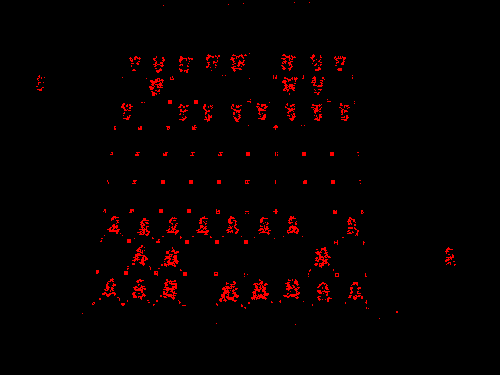

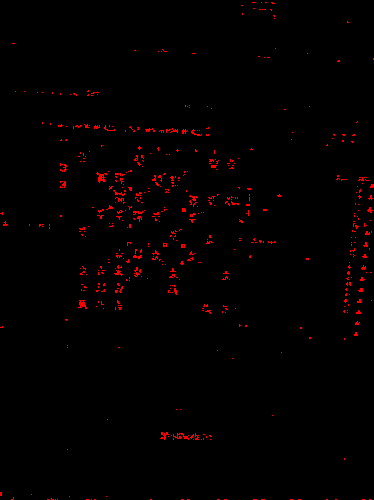

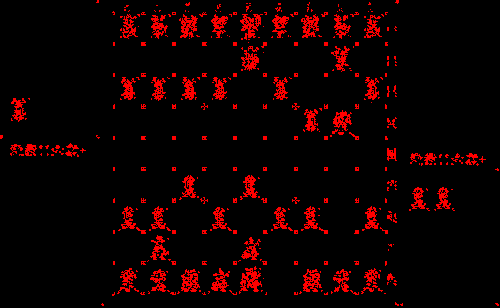

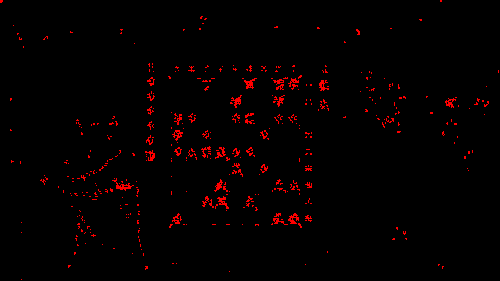

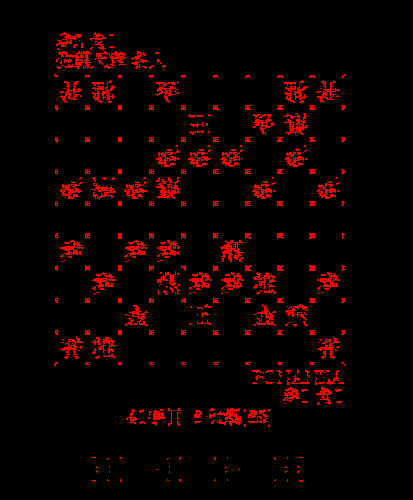

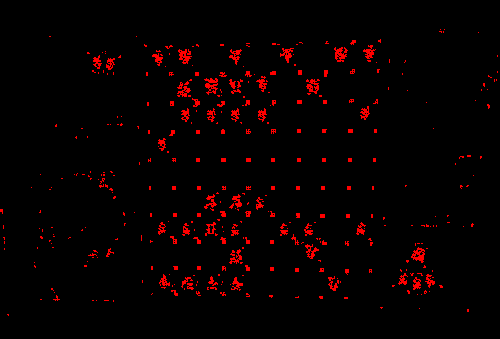

In [129]:
def corner(img, show=True):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    corners = cv2.cornerHarris(gray, 2, 3, 0.04)
    dot_img = np.copy(img)
    dot_img[corners > 0.01 * corners.max()] = [0, 0, 255]

    blank = np.zeros(img.shape, np.uint8)
    blank[corners > 0.01 * corners.max()] = [0, 0, 255]
    if show:
        display_cv_image(blank)
    return corners

for img in imgs:
    corner(img)

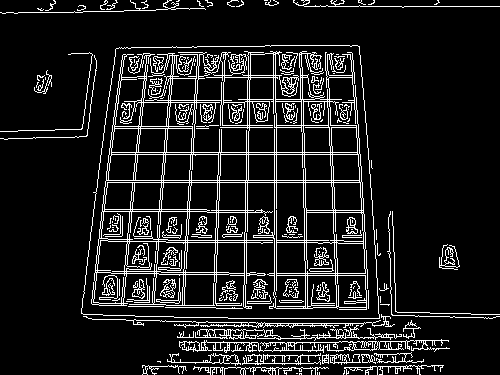

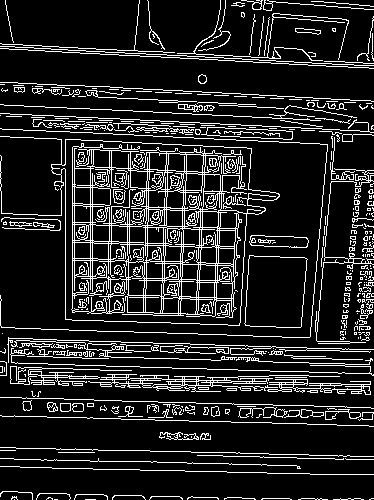

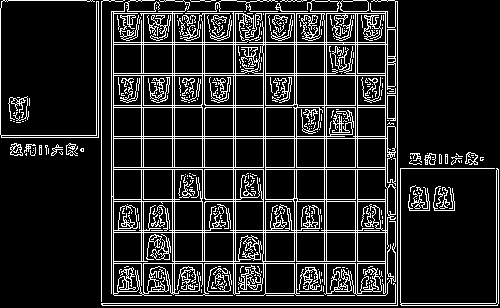

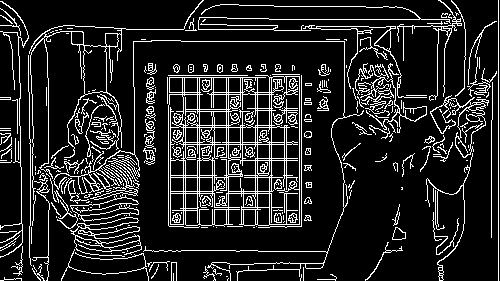

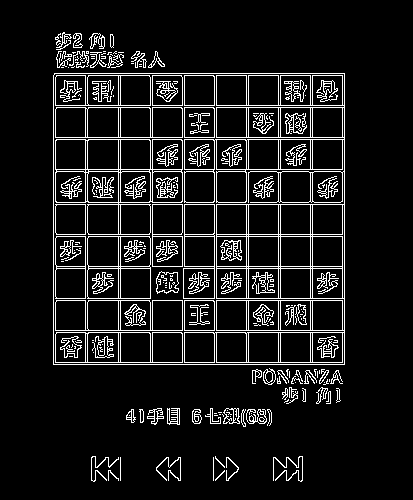

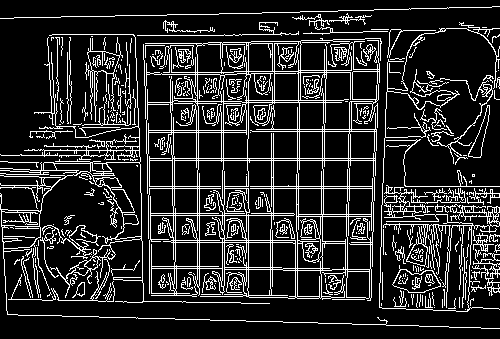

In [130]:
def edge(img, show=True):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    if show:
        display_cv_image(edges)
    return edges

for img in imgs:
    edge(img)

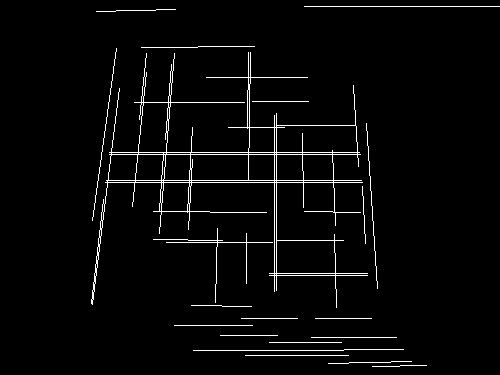

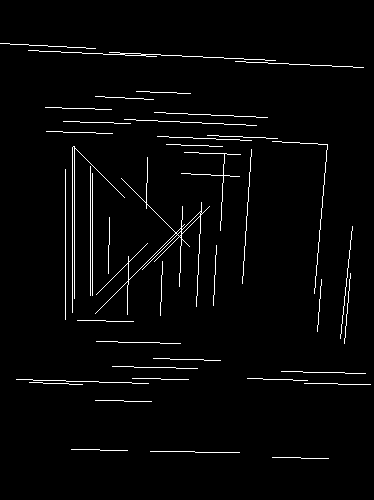

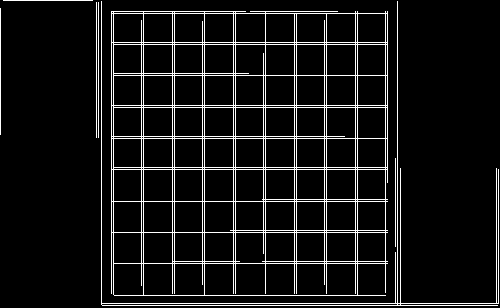

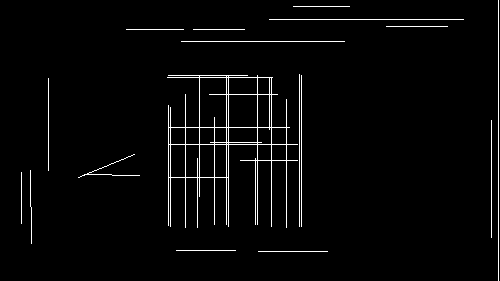

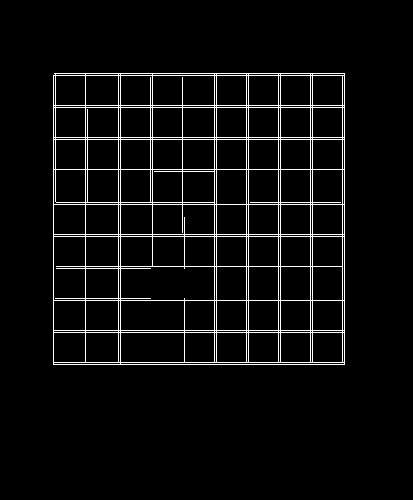

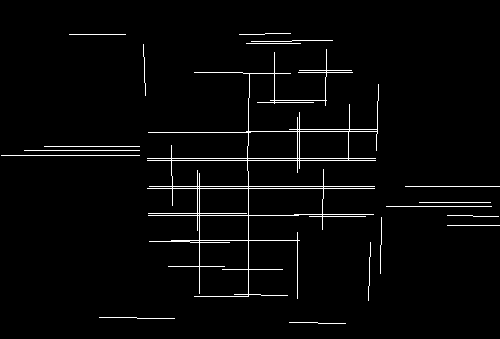

In [131]:
# イマイチ
def line(img):
    edges = edge(img, False)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 105, 100, 50, 3)
    blank = np.zeros(img.shape, np.uint8)
    for x1, y1, x2, y2 in lines[:, 0]:
        cv2.line(blank, (x1, y1), (x2, y2), (255, 255, 255), 1)
    display_cv_image(blank)
    return lines

for img in imgs:
    line(img)

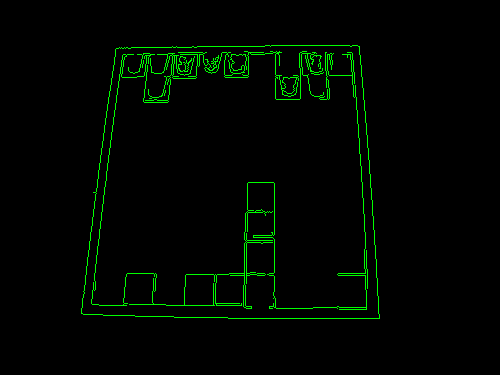

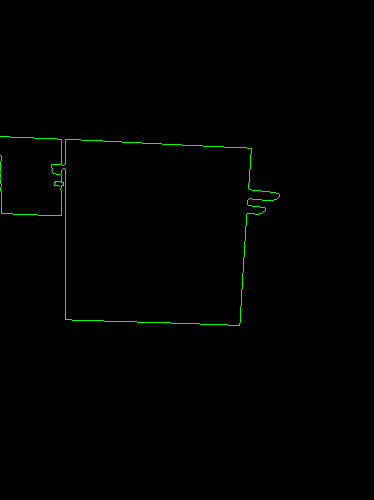

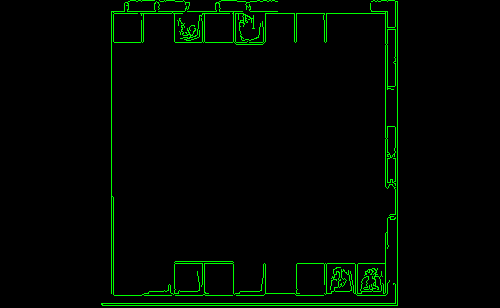

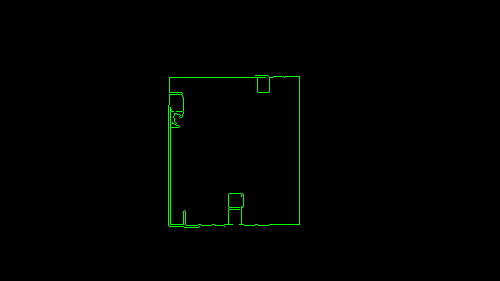

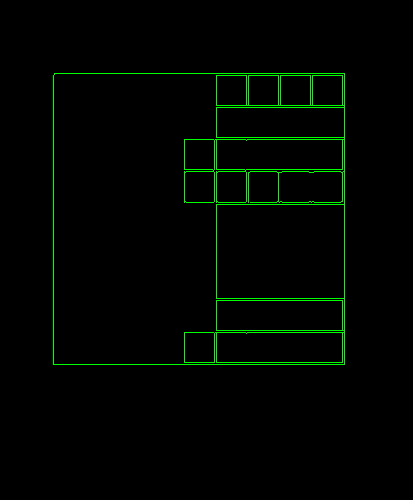

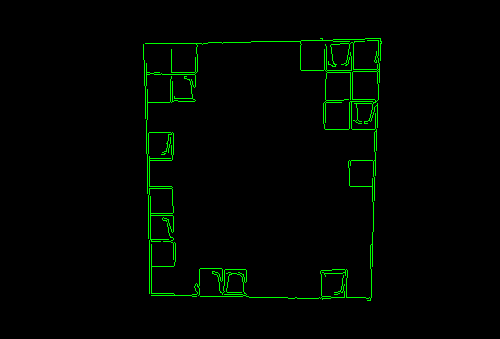

In [132]:
def contours(img, show=True):
    edges = edge(img, False)
    contours = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[1]
    blank = np.zeros(img.shape, np.uint8)
    min_area = img.shape[0] * img.shape[1] * 0.1 # 画像の何割占めるか
    large_contours = [c for c in contours if cv2.contourArea(c) > min_area]
    cv2.drawContours(blank, large_contours, -1, (0,255,0), 1)
    if show:
        display_cv_image(blank)
    return large_contours

for img in imgs:
    contours(img)

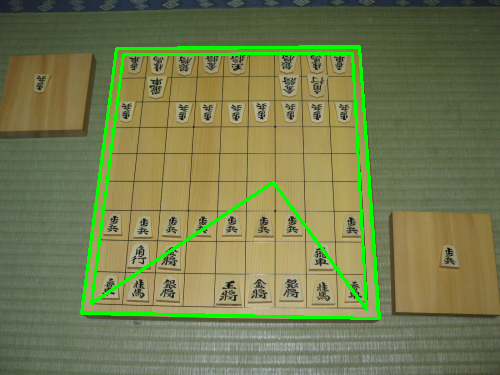

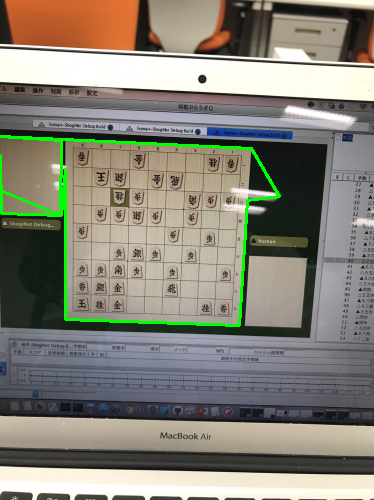

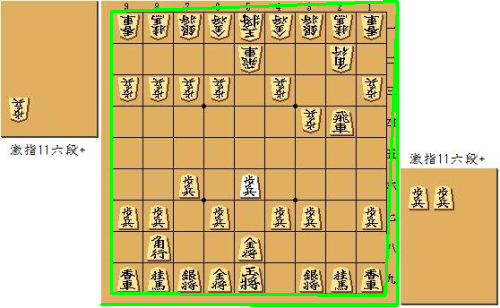

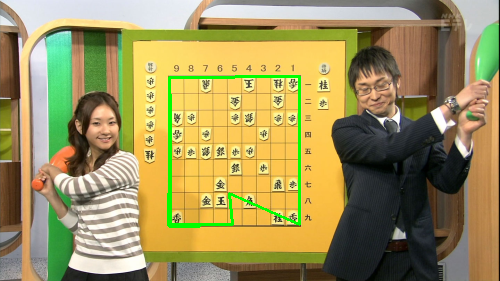

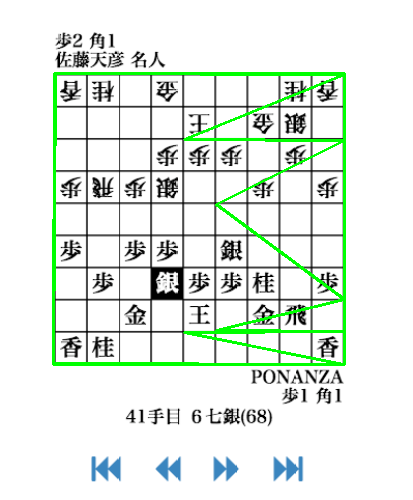

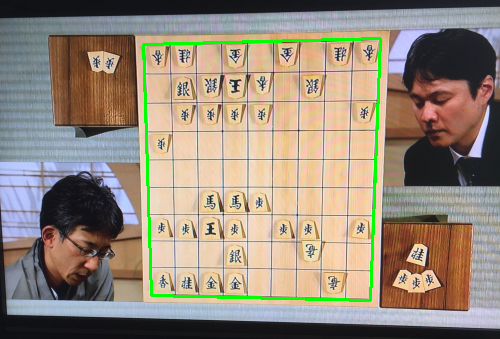

In [133]:
def poly(img, show=True):
    blank = np.copy(img)
    for cnt in contours(img, False):
        arclen = cv2.arcLength(cnt, True)
        poly = cv2.approxPolyDP(cnt, 0.02*arclen, True)
        cv2.drawContours(blank, [poly], -1, (0,255,0), 2)
    if show:
        display_cv_image(blank)

for img in imgs:
    poly(img)

32
29
25


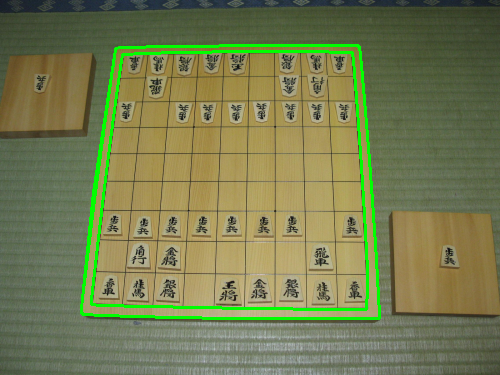

16


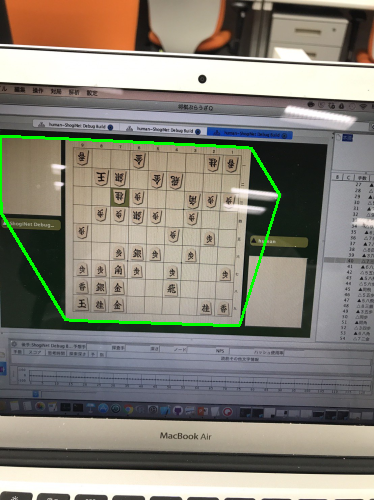

9


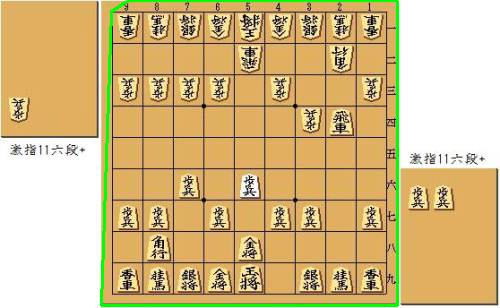

11


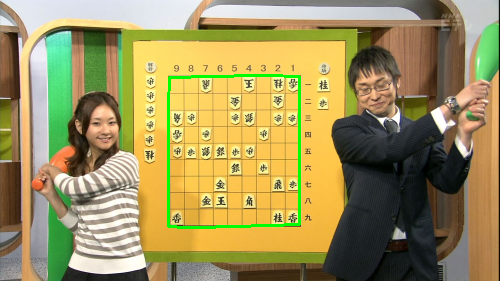

8
5


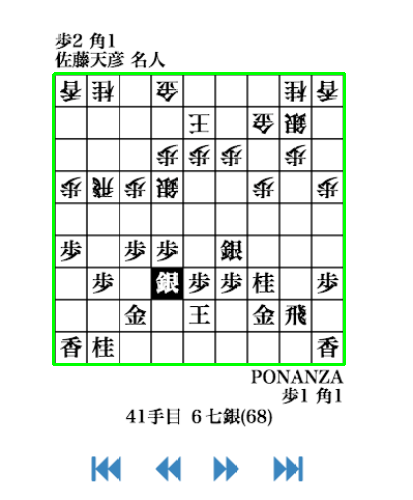

14


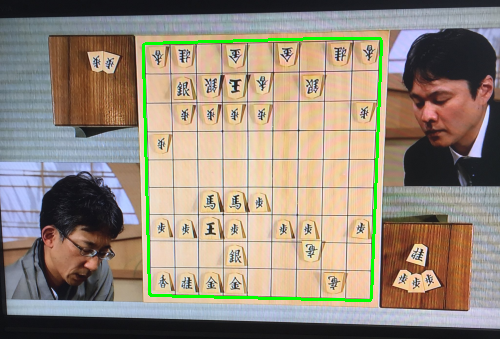

In [134]:
def convex(img, show=True):
    blank = np.copy(img)
    for cnt in contours(img, False):
        convex = cv2.convexHull(cnt)
        print(len(convex))
        cv2.drawContours(blank, [convex], -1, (0,255,0), 2)
    if show:
        display_cv_image(blank)

for img in imgs:
    convex(img)

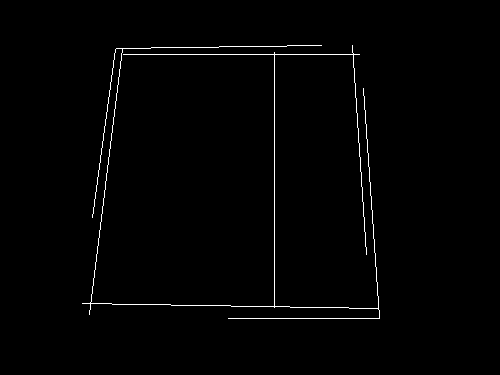

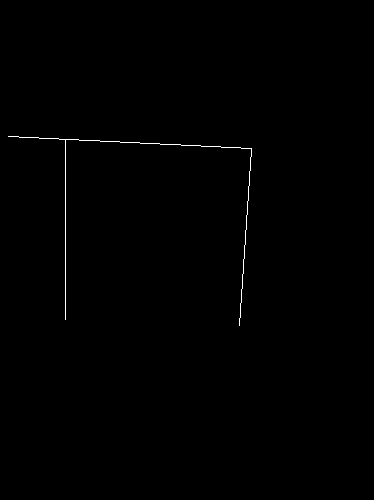

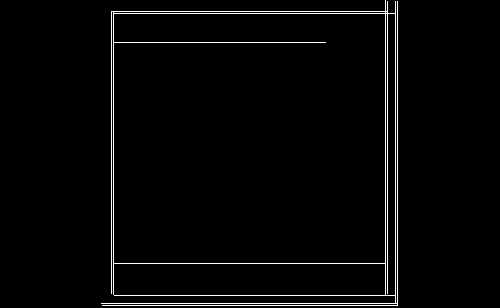

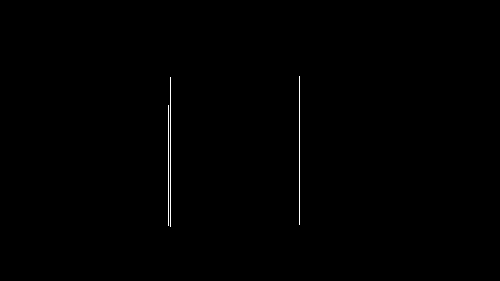

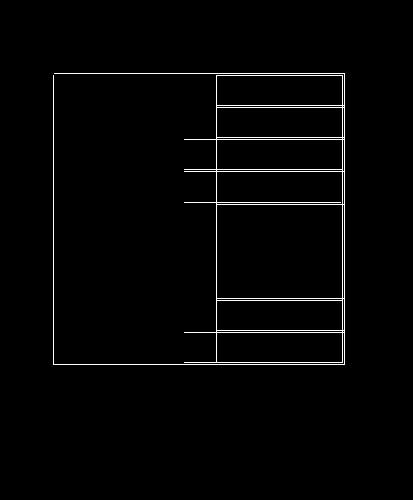

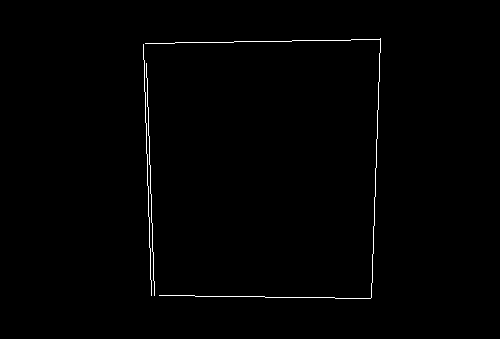

In [135]:
# イマイチ
def contour_lines(img):
    cnts = contours(img, False)
    blank = np.zeros(img.shape, np.uint8)
    blank = cv2.drawContours(blank, cnts, -1, (255,255,255), 1)
    blank = cv2.cvtColor(blank, cv2.COLOR_BGR2GRAY)
    lines = cv2.HoughLinesP(blank, 1, np.pi/180, 105, 100, 50, 200)
    blank = np.zeros(img.shape, np.uint8)
    for x1, y1, x2, y2 in lines[:, 0]:
        cv2.line(blank, (x1, y1), (x2, y2), (255, 255, 255), 1)
    display_cv_image(blank)
    return lines

for img in imgs:
    contour_lines(img)